# **AP157 Machine Learning Lab Assignment**
## Module A.2: Classification -- Morphological Classification of Galaxies using Decision Trees

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Parts 1, 2, and 3 are worth 20, 40, and 40 points, respectively).

_Credits_: This assignment is based on the Week 6 module of the Coursera course "Data-driven Astronomy", "Exploring machine learning classification" ([link](https://www.coursera.org/learn/data-driven-astronomy/home/welcome))

### Student Information

_Full Name (Last Name, First Name)_: Manliguez, Sean Arthur \\
_Student No._: 2020-07582 \\
_Section_: TX - 1

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** SEAN ARTHUR C. MANLIGUEZ

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/20
* Part 2 - []/40
* Part 3 - []/40

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

For this assignment, you will work with galaxy data from the
Sloan Digital Sky Survey (SDSS). First, you need to make a copy of the binary file ```galaxy_catalogue.npy``` and save it to a folder in your **own Google Drive**. This file is available from the AP157 Machine Learning Google Drive (under the Datasets folder).

The code cells below will (1) mount your Google Drive and (2) load ```galaxy_catalogue.npy``` from your Google Drive folder.

Mount the Google Drive where you saved the .npy file.

When you run this cell, you will be asked to sign in to your Google account and you will get an authorization code. Paste the code on the provided cell to mount the Google Drive.

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Run this command to list the directories in your Google Drive and check that the mount was successful.

In [4]:
#!ls drive/My\ Drive

Define the directory path to the location of the file, i.e. if it is in a
folder named "AP157" under My Drive, then the file path will be "/content/drive/My Drive/AP157". Change the string variable in the code cell below, as needed:

In [5]:
file_path = "/content/drive/My Drive/AP157/Datasets/"

Now, we can load the file using $\tt numpy$'s $\tt load$ function below.





In [6]:
import numpy as np

data = np.load(file_path + 'galaxy_catalogue.npy')

Print out the first couple of rows. Note that the columns are: $u-g$, $g-r$, $r-i$, $i-z$, eccentricity, $m_u$, $m_g$, $m_r$, $m_i$, $m_z$, $R_{50,u}$, $R_{50,r}$, $R_{50,z}$, $R_{90,u}$, $R_{90,r}$, $R_{90,z}$, and class.

#### PART 1 - Get features and targets *(20 pts.)*

Write a function ```get_features_targets``` that splits the dataset into input features and their corresponding targets. In our case, the inputs are the 4 galaxy colors ($u-g$, $g-r$, $r-i$, and $i-z$), eccentricity, $ugriz$ magnitudes, and concentrations $R_{50}/R_{90}$ in the $u$, $r$, and $z$ bands. The targets are the classes.

Here's an example of how your function should work:
```
>>> features, targets = get_features_targets(data)
>>> print("Features shape:", features.shape
>>> print("Targets shape:", targets.shape)
Features shape: (780, 13)
Targets shape: (780,)
```

In [7]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Getting Features

The function `get_features_targets(data)` takes the variable `data` as an argument. It then assigns `df1` as a dataframe from the converted `data` using the `pandas` library. Three columns containing ***$R_{50}/R_{90}$***  in the **u**, **r**, and **z** bands are inserted into the dataframe with datatype **`u_concentration`**, **`r_concentration`** and **`z_concentration`** respectively. *The features are extracted from the first 13 columns of the dataframe, while the targets are the last column of the dataframe*. The targets correspond to the classification of the object with a given feature. Speficically, these correspond to whether the object is a ***merger, elliptical, spiral***.

In [8]:
def get_features_targets(data):
  df1 = pd.DataFrame(data) #converting the data into a dataframe using pandas
  df1.insert(10, 'u_concentration',df1['petroR50_u']/df1['petroR90_u']) #inserting the values of the concentration of the u-band into the 11th column
  df1.insert(11, 'r_concentration',df1['petroR50_r']/df1['petroR90_r']) #inserting the values of the concentration of the r-band into the 11th column
  df1.insert(12, 'z_concentration',df1['petroR50_z']/df1['petroR90_z']) #inserting the values of the concentration of the z-band into the 11th column
  features = df1.iloc[:, 0:13] #identifies the first 13 columns of the dataframe
  targets = df1.iloc[:,-1] #identifies the last column of the dataframe
  return df1, features, targets

#### Tabular presentation of the extracted features

In [9]:
df1, features, targets = get_features_targets(data)
display(features)

,u-g,g-r,r-i,i-z,ecc,m4_u,m4_g,m4_r,m4_i,m4_z,u_concentration,r_concentration,z_concentration
0,1.85765,0.67158,0.42310,0.30610,0.585428,2.251946,2.339849,2.380652,2.359738,2.395528,0.598113,0.462170,0.333373
1,1.74259,0.86085,0.44927,0.28851,0.749812,2.031566,2.084156,2.092272,2.124075,2.133154,0.383216,0.416320,0.416091
2,2.10697,0.96710,0.56810,0.33747,0.630089,1.992887,2.450746,2.473116,2.465324,2.438683,0.340249,0.433751,0.307428
3,1.22840,0.60446,0.39049,0.28913,0.668999,2.056115,2.182252,2.309510,2.391414,2.472397,0.378602,0.333005,0.314361
4,1.80792,0.78124,0.45528,0.35067,0.500170,2.259167,2.194723,2.264567,2.334713,2.352568,0.353735,0.322113,0.339692
...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,1.34594,0.64285,0.37813,0.23107,0.779956,2.421518,2.248886,2.589488,2.615007,2.601444,0.428644,0.472435,0.437152
776,1.19482,0.49611,0.31017,0.16244,0.722125,2.211442,2.294102,2.327795,2.371559,2.358487,0.519802,0.415303,0.390645
777,1.21489,0.57253,0.35423,0.21312,0.793392,2.264709,2.319192,2.388157,2.392148,2.384103,0.484092,0.434376,0.465523
778,1.41797,0.86460,0.40020,0.35307,0.835901,2.011354,2.023669,2.326873,2.676343,2.560389,0.334817,0.546294,0.479873


#### Tabular presentation of the targets

In [10]:
display(targets)

0      merger
1      merger
2      merger
3      merger
4      merger
        ...  
775    spiral
776    spiral
777    spiral
778    spiral
779    spiral
Name: class, Length: 780, dtype: object

#### PART 2 - Train and run a decision tree model *(40 pts.)*

Write a function ```predict_class``` that will train and validate a model that predicts a galaxy's class from its photometric properties. In particular, it should do the following:
1. Split the dataset into a training and test dataset using an 80:20 split.
2. Train the input model using the training dataset features and targets.
3. Return two arrays-- the predicted and actual class of the test galaxies.

Here's an example of how your function should work:
```
import numpy as np
from sklearn.tree import DecisionTreeClassifier

data = np.load(file_path + 'galaxy_catalogue.npy')
predicted_class, actual_class = predict_class(data)

for i in np.arange(3):
   print("%d, %s, %s" & (i, predicted_class[i], actual_class[i]))
```

# Prediction

The function `predict_class(X, Y)` takes in the **`features`** and **`targets`** as the arguments **`X,Y`**. These inputs are then used in **splitting the training and testing** sets using the `sklearn` function `train_test_split`. The *test size is set to be 20% of the dataset*, so the remaining *80% is the training set*. Additionally, `random_state = 0` was set for replicability and for easier debugging.

Importantly, this function returns the **predicted class** and **actual class** of the objects in the dataset as well as the **classifier `clf`**.

In [11]:
def predict_class(X,Y): #format: predict_class(features, targets)
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=0) #splitting dataset into training set and testing set
  clf = tree.DecisionTreeClassifier(random_state = 0) #initializing the decision tree classifier
  clf = clf.fit(X_train, Y_train) #fitting the classifier into the training set
  predicted_class = clf.predict(X_test) #testing the classifer with the test set
  actual_class = Y_test.to_numpy() #extract the actual class of the test set
  return predicted_class, actual_class, clf #returns the predicted class, actual class, and the classifier

#### Calling the function `predict_class()`.

In [12]:
predicted_class, actual_class, clf = predict_class(features, targets)

#comparing the predicted and actual class for the first 5 objects
for i in np.arange(5):
  print("%d, %s, %s" % (i, predicted_class[i], actual_class[i]))


0, spiral, spiral
1, elliptical, elliptical
2, merger, merger
3, elliptical, merger
4, elliptical, elliptical


#### PART 3 - Confusion matrix and accuracy *(40 pts.)*

1. Get the confusion matrix for your test dataset-- this is a 3 x 3 matrix with the counts for each combination of actual and predicted class. *(25 pts.)*

2. Get the test accuracy of your decision tree classifer, defined as the number of correct predictions divided by the total number of predictions. *(15 pts.)*

#### Using the `metrics` library of `sklearn`

In [13]:
from sklearn import metrics

With the `metrics` library, the variable `confusion_matrix` is assigned a 3x3 matrix using the `metrics.confusion_matrix()` function, which takes in the actual class, predicted class, and the class labels respectively.

Meanwhile, the variable `cm_display` stores the figure for displaying the `confusion_matrix`

In [14]:
confusion_matrix = metrics.confusion_matrix(actual_class, predicted_class, labels = clf.classes_)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = clf.classes_)
print(confusion_matrix)

[[45  6  2]
 [ 7 35  6]
 [ 0 10 45]]


#### Visualizing the confusion matrix

In the confusion matrix, the rows correspond to the predicted label while the columns correspond to the true label. That is, the elements in the diagonal of the confusion matrix denotes the number of accurate predictions (e.g. the predicted label matches the true label). The non-diagonal elements correspond to the wrong predictions of the model.

Column-wise, the non-diagonal elements are the **false positives** of that class. Row-wise, the non-diagonal elements are the **false negatives** of that class. For example in the first row, there should be 53 true ellipticals but only 45 are correctly labeled. In the first column, 52 are predicted to be elliptical, but only 45 are correctly labeled. The remaining 7 were actually mergers.

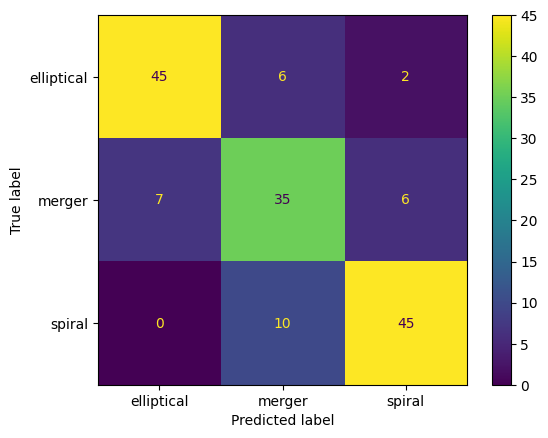

In [15]:
cm_display.plot() #plots the confusion matrix as figure with colorbar corresponding to the number of objects with a particular actual and predicted class
plt.show()

### Determining the accuracy of the model

The code below determines the accuracy of the model by counting the number of matches using boolean conditioning. The variable `matches` is an array containing zeros and ones, with one corresponding to a match between the `predicted_class` and the `actual_class`. The total number of matches is the `matches.sum()`. Accuracy is the total matches divided by the total number of predictions `predicted_class.shape`

In [16]:
matches = predicted_class == actual_class #boolean conditioning to determine the correctly labeled objects by matching the predicted and actual classes
accuracy = matches.sum()/predicted_class.shape #the number of correctly matched divided by the number of predictions done
print(f"Accuracy of the model: {accuracy}")

Accuracy of the model: [0.80128205]


# VISUALIZING DECISION TREE

The graphic below **visualizes the decision tree** and how the training set is split in order to make a prediction. The parameter **`gini` determines the importance of feature**. With that, it can be seen that **`r_concentration` is the largest contributor** to the splitting of the set since it has the largest `gini`.

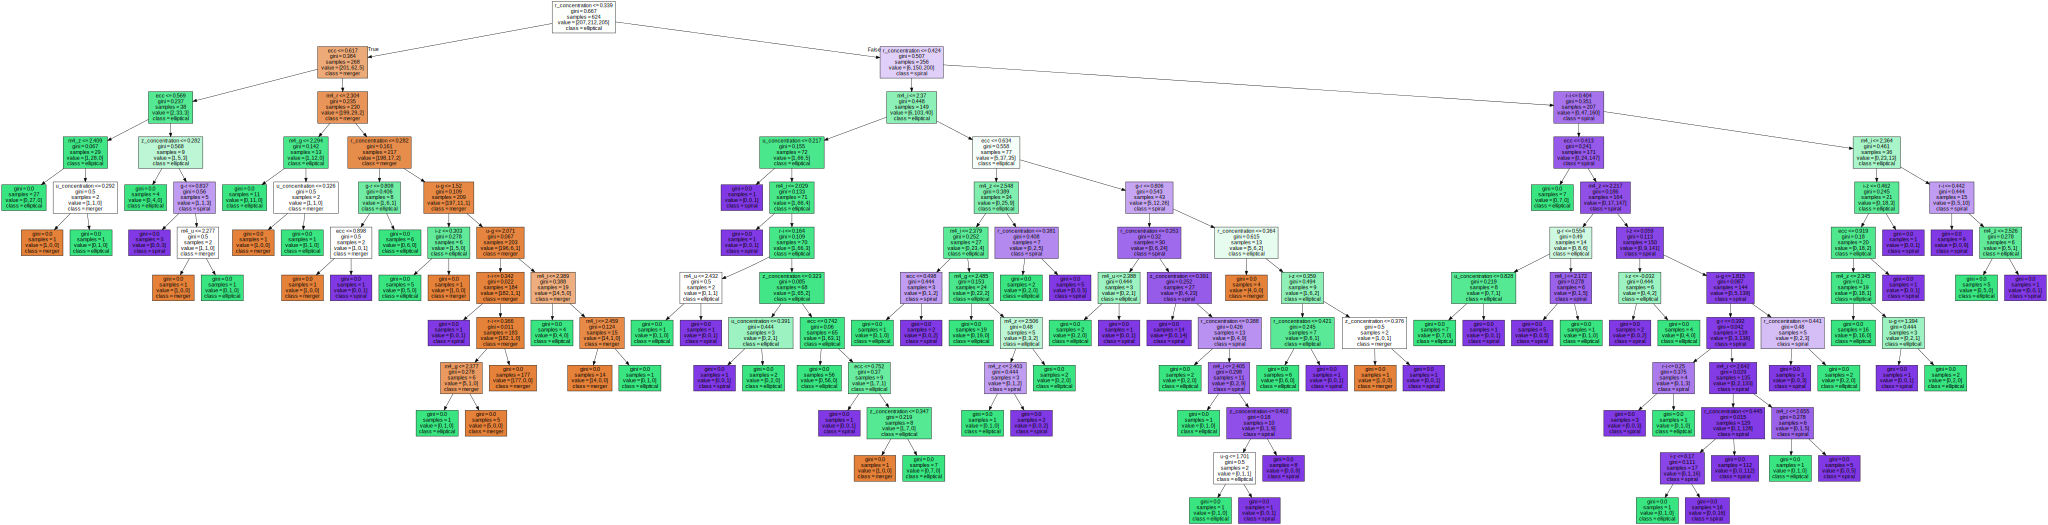

In [17]:
import graphviz #necessary import for creating a graphics of the decisiontree
df = pd.DataFrame(data)
dot_data = tree.export_graphviz(clf, filled=True, feature_names = features.columns, class_names = ['merger', 'elliptical', 'spiral']) #variable to store the data for plotting
graph = graphviz.Source(dot_data, format="png")
graph #graphing of the decision tree